In [2]:
import json
import numpy as np
import pandas as pd
from sklearn.feature_extraction import text
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection as modsel
import sklearn.preprocessing as preproc

## 例4-1 使用 Python 加载并清理 Yelp 点评数据集
Load and prep Yelp reviews data

In [3]:
# Load Yelp Business data
# 加载Yelp商家数据
biz_f = open('data/yelp_dataset/business.json')
biz_df = pd.DataFrame([json.loads(x) for x in biz_f.readlines()])
biz_f.close()

In [4]:
# Load Yelp Reviews data
# 加载Yelp点评数据
review_file = open('data/yelp_dataset/review.json')
js = []
for i in range(100000):
    js.append(json.loads(review_file.readline()))
review_file.close()
review_df = pd.DataFrame(js)

In [5]:
# Pull out only Nightlife and Restaurants businesses
# 选取出夜店和餐馆
two_biz = biz_df[biz_df['categories'].str.contains('Nightlife|Restaurants').fillna(False)]

In [6]:
two_biz.shape

(63904, 14)

In [7]:
## Join with the reviews to get all reviews on the two types of business
# 与点评数据连接，得到两种类型商家的所有点评
twobiz_reviews = two_biz.merge(review_df, on='business_id', how='inner')

In [8]:
twobiz_reviews.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,...,stars_x,state,cool,date,funny,review_id,stars_y,text,useful,user_id
0,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,...,2.5,ON,0,2017-01-27 21:54:30,2,6W0MQHmasK0IsaoDo4bmkw,3.0,My girlfriend and I went for dinner at Emerald...,3,2K62MJ4CJ19L8Tp5pRfjfQ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,...,2.5,ON,0,2013-06-24 23:11:30,0,BeeBfUxvzD4qNX4HxrgA5g,3.0,We've always been there on a Sunday so we were...,0,A0kENtCCoVT3m7T35zb2Vg
2,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,...,2.5,ON,0,2016-01-04 12:59:22,0,A1D2kUnZ0HTroFreAheNSg,3.0,"***No automatic doors, not baby friendly!*** I...",0,SuOLY03LW5ZcnynKhbTydA
3,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,...,2.5,ON,0,2014-05-09 02:38:43,0,2pf45Stf-pNew-xgTababQ,1.0,"Horrible service,\nI went there tonight with m...",1,lymyUak6KNcNKoDbK87MiQ
4,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,...,2.5,ON,2,2011-03-21 14:39:55,1,RHhlmL07evgAdPaXQV8Omg,4.0,One of the gauges of a good Chinese restaurant...,2,6vU0I5XgCv9OQHZ76rV6qw


In [9]:
twobiz_reviews.shape

(66341, 22)

In [10]:
# pkl 格式的压缩率较高，生成的文件可以很小
# twobiz_reviews.to_csv('data/yelp_dataset/twobiz_reviews.csv', index=False)
twobiz_reviews.to_pickle('data/yelp_dataset/twobiz_reviews.pkl')

In [11]:
# twobiz_reviews = pd.read_csv('data/yelp_dataset/twobiz_reviews.csv')
twobiz_reviews = pd.read_pickle('data/yelp_dataset/twobiz_reviews.pkl')

In [12]:
twobiz_reviews.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,...,stars_x,state,cool,date,funny,review_id,stars_y,text,useful,user_id
0,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,...,2.5,ON,0,2017-01-27 21:54:30,2,6W0MQHmasK0IsaoDo4bmkw,3.0,My girlfriend and I went for dinner at Emerald...,3,2K62MJ4CJ19L8Tp5pRfjfQ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,...,2.5,ON,0,2013-06-24 23:11:30,0,BeeBfUxvzD4qNX4HxrgA5g,3.0,We've always been there on a Sunday so we were...,0,A0kENtCCoVT3m7T35zb2Vg
2,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,...,2.5,ON,0,2016-01-04 12:59:22,0,A1D2kUnZ0HTroFreAheNSg,3.0,"***No automatic doors, not baby friendly!*** I...",0,SuOLY03LW5ZcnynKhbTydA
3,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,...,2.5,ON,0,2014-05-09 02:38:43,0,2pf45Stf-pNew-xgTababQ,1.0,"Horrible service,\nI went there tonight with m...",1,lymyUak6KNcNKoDbK87MiQ
4,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,...,2.5,ON,2,2011-03-21 14:39:55,1,RHhlmL07evgAdPaXQV8Omg,4.0,One of the gauges of a good Chinese restaurant...,2,6vU0I5XgCv9OQHZ76rV6qw


In [13]:
# Trim away the features we won't use
# 去除我们不需要的特征
twobiz_reviews = twobiz_reviews[['business_id',
                                 'name',
                                 'stars_y',
                                 'text',
                                 'categories']]

In [14]:
# Create the target column--True for Nightlife businesses, and False otherwise
# 创建目标列——夜店类型的商家为True，否则为False
# twobiz_reviews['target'] = twobiz_reviews.apply(lambda x: 'Nightlife' in x['categories'],
#                                                 axis=1)
twobiz_reviews['target'] = twobiz_reviews['categories'].str.contains('Nightlife')

## 例4-2 创建平衡的分类数据集

In [15]:
## Now pull out each class of reviews separately, 
## so we can create class-balanced samples for training
# 创建一个类别平衡的子样本，供练习使用
nightlife = twobiz_reviews[twobiz_reviews.apply(lambda x: 'Nightlife' in x['categories'], axis=1)]
restaurants = twobiz_reviews[twobiz_reviews.apply(lambda x: 'Restaurants' in x['categories'], axis=1)]

In [16]:
nightlife.shape

(18350, 6)

In [17]:
restaurants.shape

(63667, 6)

In [18]:
nightlife_subset = nightlife.sample(frac=1, random_state=123)
restaurant_subset = restaurants.sample(frac=0.289, random_state=123)

In [19]:
nightlife_subset.shape

(18350, 6)

In [20]:
restaurant_subset.shape

(18400, 6)

In [21]:
nightlife_subset.to_pickle('data/yelp_dataset/nightlife_subset.pkl')
restaurant_subset.to_pickle('data/yelp_dataset/restaurant_subset.pkl')

In [22]:
nightlife_subset = pd.read_pickle('data/yelp_dataset/nightlife_subset.pkl')
restaurant_subset = pd.read_pickle('data/yelp_dataset/restaurant_subset.pkl')

In [23]:
combined = pd.concat([nightlife_subset, restaurant_subset])

In [24]:
combined['target'] = combined.apply(lambda x: 'Nightlife' in x['categories'],
                                    axis=1)

In [25]:
combined

,business_id,name,stars_y,text,categories,target
723,v7ZFEEqJBg_r8NCwHRP_2A,Bistro Divino,5.0,This is a lovely little place with fabulous fo...,"Food, Pizza, Wine Bars, Bars, Restaurants, Nig...",True
55824,3b14ebd1k9y7VJbp5hC0gg,Beaudevin,5.0,While scoping out all the cafeteria- line styl...,"Wine Bars, Sandwiches, Arts & Entertainment, N...",True
9156,ALgH4S65heUffUjcBiNJ0Q,West Addison,4.0,Came here for St. Patty's Day with a group of ...,"Sports Bars, Nightlife, Restaurants, Bars, Ame...",True
64825,w1c_Uy60LSDiMsSjAsEqkw,Rumfish Grille,1.0,The central business of this establishment is ...,"Steakhouses, Nightlife, Bars, Restaurants, Ame...",True
39406,lv5Bnqlt93NnvNJ2oNcQ8Q,Los Cucos Mexican Cafe,5.0,Wow muy buena comida y excelente servicio grac...,"Caterers, Tex-Mex, Restaurants, Nightlife, Mex...",True
23120,uuGL8diLlHfeUeFuod3F-w,Tom's Urban,5.0,I came in for a quick lunch with my girlfriend...,"Gastropubs, Nightlife, Restaurants, American (...",True
62981,mz9ltimeAIy2c2qf5ctljw,Cirque du Soleil - The Beatles LOVE,5.0,"I think the bottom line on this show is that, ...","Arts & Entertainment, Music Venues, Nightlife,...",True
48521,sk0stgY4NDJYOX1MbNJ3Pg,T-Mobile Arena,5.0,Loooove the arena. 4.5 stars but bumped it up ...,"Music Venues, Performing Arts, Nightlife, Arts...",True
11963,xKL4JhiFn75HyTqW8tfR6w,The Improv Comedy Club,3.0,You are at the mercy of who is the comedian at...,"Nightlife, Comedy Clubs",True
33933,1qwkbN3wu3AGDxMTXVz2gA,Topgolf,5.0,"Not a place I would go for dinner, but they ha...","Event Planning & Services, Party & Event Plann...",True


In [26]:
# Split into training and test data sets
# 划分训练集和测试集
training_data, test_data = modsel.train_test_split(combined, 
                                                   test_size=0.3, 
                                                   random_state=123)

In [27]:
training_data.shape

(25725, 6)

In [28]:
test_data.shape

(11025, 6)

## 4.2.2 使用tf-idf变换来缩放词袋
### 例 4-3　 转换特征

In [31]:
# Represent the review text as a bag-of-words
# 用词袋表示点评文本
bow_transform = text.CountVectorizer()
X_tr_bow = bow_transform.fit_transform(training_data['text'])

In [32]:
len(bow_transform.vocabulary_)

36468

In [35]:
X_te_bow = bow_transform.transform(test_data['text'])

In [36]:
y_tr = training_data['target']
y_te = test_data['target']

In [37]:
# Create the tf-idf representation using the bag-of-words matrix
# 使用词袋矩阵创建tf-idf表示
tfidf_trfm = text.TfidfTransformer(norm=None)
X_tr_tfidf = tfidf_trfm.fit_transform(X_tr_bow)

In [38]:
X_te_tfidf = tfidf_trfm.transform(X_te_bow)

In [39]:
# 仅出于练习的目的，对词袋表示进行l2归一化
X_tr_l2 = preproc.normalize(X_tr_bow, axis=0)
X_te_l2 = preproc.normalize(X_te_bow, axis=0)

## 例4-4 使用默认参数训练逻辑回归分类器

In [44]:
def simple_logistic_classify(X_tr, y_tr, X_test, y_test, description, _C=1.0):
    ## Helper function to train a logistic classifier and score on test data
    ### 辅助函数，用来训练逻辑回归分类器，并在测试数据上进行评分。
    m = LogisticRegression(C=_C, solver='liblinear').fit(X_tr, y_tr)
    s = m.score(X_test, y_test)
    print ('Test score with', description, 'features:', s)
    return m

In [45]:
m1 = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow')
m2 = simple_logistic_classify(X_tr_l2, y_tr, X_te_l2, y_te, 'l2-normalized')
m3 = simple_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf')

Test score with bow features: 0.7951927437641724
Test score with l2-normalized features: 0.7498412698412699
Test score with tf-idf features: 0.7743310657596372


事与愿违，结果显示准确率最高的分类器使用的是词袋特征，这真是出乎意料。  
实际上， 出现这种情况的原因在于分类器没有很好地“调优”，这是在比较分类器时经常犯的错误。

## 例4-5 使用网格搜索对逻辑回归进行调优
Tune regularization parameters using grid search

In [46]:
# 确定一个搜索网格，然后对每种特征集合执行5-折网格搜索
param_grid_ = {'C': [1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2]}
# 为词袋表示法进行分类器调优
bow_search = modsel.GridSearchCV(LogisticRegression(), cv=5, param_grid=param_grid_)
# 为L2-归一化词向量进行分类器调优
l2_search = modsel.GridSearchCV(LogisticRegression(), cv=5,
                               param_grid=param_grid_)
# 为tf-idf进行分类器调优
tfidf_search = modsel.GridSearchCV(LogisticRegression(), cv=5,
                                   param_grid=param_grid_)

In [47]:
%%time
bow_search.fit(X_tr_bow, y_tr)

/home/appadmin/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [48]:
bow_search.best_score_

0.7922254616132167

In [50]:
%%time
l2_search.fit(X_tr_l2, y_tr)

/home/appadmin/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CPU times: user 13.1 s, sys: 24.1 ms, total: 13.1 s
Wall time: 13.1 s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [51]:
l2_search.best_score_

0.7861613216715257

In [53]:
%%time
tfidf_search.fit(X_tr_tfidf, y_tr)

/home/appadmin/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CPU times: user 1min 32s, sys: 3.48 ms, total: 1min 32s
Wall time: 1min 32s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [54]:
tfidf_search.best_score_

0.7962293488824101

In [55]:
bow_search.best_params_

{'C': 1.0}

In [56]:
l2_search.best_params_

{'C': 10.0}

In [57]:
tfidf_search.best_params_

{'C': 0.001}

In [63]:
# 检查网格搜索的一个输出，看看它是如何运行的
bow_search.cv_results_
# l2_search.cv_results_
# tfidf_search.cv_results_

{'mean_fit_time': array([ 0.20936193,  0.37182889,  2.32752681,  5.30911713, 11.35843544,
        15.91900396]),
 'std_fit_time': array([0.00543066, 0.0194037 , 0.24400674, 0.28612785, 1.56425142,
        1.21037819]),
 'mean_score_time': array([0.00233417, 0.00233431, 0.00238228, 0.00235901, 0.00234666,
        0.00238104]),
 'std_score_time': array([2.30314816e-05, 2.71032328e-05, 5.72105240e-05, 5.50887474e-05,
        9.64060494e-06, 2.64863190e-05]),
 'param_C': masked_array(data=[1e-05, 0.001, 0.1, 1.0, 10.0, 100.0],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1e-05},
  {'C': 0.001},
  {'C': 0.1},
  {'C': 1.0},
  {'C': 10.0},
  {'C': 100.0}],
 'split0_test_score': array([0.627089  , 0.72697241, 0.7897396 , 0.79323747, 0.78663039,
        0.76797513]),
 'split1_test_score': array([0.627089  , 0.72522347, 0.79440342, 0.79071123, 0.76816945,
        0.75320637]),
 'split2_test_score': array([0.6

## 在箱线图中绘制出交叉验证结果,对分类器性能进行可视化比较
Plot cross validation results

In [64]:
import pickle

In [65]:
results_file = open('data/yelp_dataset/tfidf_gridcv_results.pkl', 'wb')
pickle.dump(bow_search, results_file, -1)
pickle.dump(tfidf_search, results_file, -1)
pickle.dump(l2_search, results_file, -1)
results_file.close()

In [66]:
pkl_file = open('data/yelp_dataset/tfidf_gridcv_results.pkl', 'rb')
bow_search = pickle.load(pkl_file)
tfidf_search = pickle.load(pkl_file)
l2_search = pickle.load(pkl_file)
pkl_file.close()

In [70]:
search_results = pd.DataFrame.from_dict({
    'bow': bow_search.cv_results_['mean_test_score'],
    'l2': l2_search.cv_results_['mean_test_score'],
    'tfidf': tfidf_search.cv_results_['mean_test_score']
})
search_results

,bow,l2,tfidf
0,0.627094,0.627094,0.670943
1,0.728630,0.627094,0.796229
2,0.790943,0.627794,0.787600
3,0.792225,0.708455,0.767891
4,0.779475,0.786161,0.754519
5,0.762255,0.783907,0.751059


In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

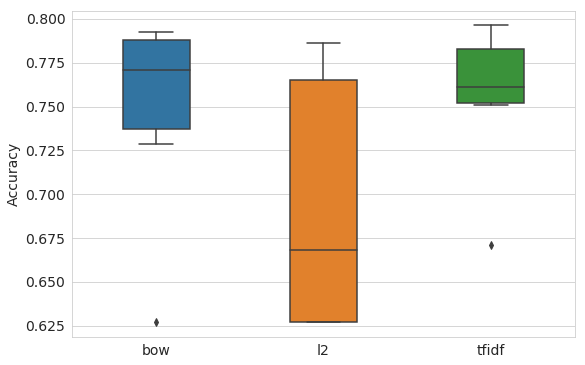

In [76]:
# 在箱线图中绘制出交叉验证结果 
# 对分类器性能进行可视化比较
plt.figure(figsize=(9, 6))
ax = sns.boxplot(data=search_results, width=0.4)
ax.set_ylabel('Accuracy', size=14)
ax.tick_params(labelsize=14)
plt.savefig('tfidf_gridcv_results.png')

## 例4-6 比较不同特征集合的最终训练与测试步骤

In [77]:
# 使用前面找到的最优超参数设置，在整个训练集上训练一个最终模型
# 在测试集上测量准确度
m1 = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow',
                              _C=bow_search.best_params_['C'])
m2 = simple_logistic_classify(X_tr_l2, y_tr, X_te_l2, y_te, 'l2-normalized',
                              _C=l2_search.best_params_['C'])
m3 = simple_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf',
                              _C=tfidf_search.best_params_['C'])

Test score with bow features: 0.7951927437641724
Test score with l2-normalized features: 0.7942857142857143
Test score with tf-idf features: 0.7968253968253968
